# UNIDAD 4 - PROYECTO: ANÁLISIS DE SENTIMIENTOS Y PREDICCIÓN.

## ALUMNO: Alan Jafet Leon Loeza
## NÚMERO DE CONTROL: 20120126


## PRESENTACIÓN.

El siguiente proyecto consiste en emplear el análisis de sentimientos para tratar de predecir las calificaciones de una serie.

El dataset es sobre las calificaciones que recibió la adaptación al "live-action" el anime "OnePiece".

El dataset contiene las reseñas que se recibieron en la plataforma de Netflix, el dataset contiene información como:

* Título.
* Reseña.
* Fecha.
* Calificación.


## ETAPA 1: ANÁLISIS EXPLORATORIO DE LOS DATOS.

### Paso 1. Importe las librerías necesarias (pandas, numpy, seaborn, nltk, etc...)

### Paso 2. Cargue y muestre información del dataset; muestre información estadística de las columnas numéricas.

### Paso 3. Identifique los datos nulos: muestre las filas que contienen datos nulos (no se deben tratar aún).

### Paso 4. Muestre la distribución de la columna "Rating", haga un análisis de la distribución.

### Paso 5. Identifique si alguna de las columnas se puede convertir en categórica.


In [1]:
#Paso 1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\mjkam\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\mjkam\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\mjkam\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\mjkam\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\mjkam\AppData\Roaming\nltk_data...
[nltk_data]    | 

[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\mjkam\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\mjkam\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\mjkam\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\mjkam\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\mjkam\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package nps_chat

[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     C:\Users\mjkam\AppData\Roaming\nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to
[nltk_data]    |     C:\Users\mjkam\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\mjkam\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     C:\Users\mjkam\AppData\Roaming\nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading package universal_tagset to
[nltk_data]    |     C:\Users\mjkam\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_tagset is already up-to-date!
[nltk_data]    | Downloading package universal

True

In [3]:
#Paso 2
df = pd.read_csv("reviews.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   878 non-null    object 
 1   Review  878 non-null    object 
 2   Date    878 non-null    object 
 3   Rating  870 non-null    float64
dtypes: float64(1), object(3)
memory usage: 27.6+ KB
None


In [4]:
display(df.describe())

,Rating
count,870.000000
mean,8.517241
std,2.268826
min,1.000000
25%,8.000000
50%,9.000000
75%,10.000000
max,10.000000


In [5]:
#Paso 3
print(df.isna().sum().sort_values(ascending=False))

Rating    8
Title     0
Review    0
Date      0
dtype: int64


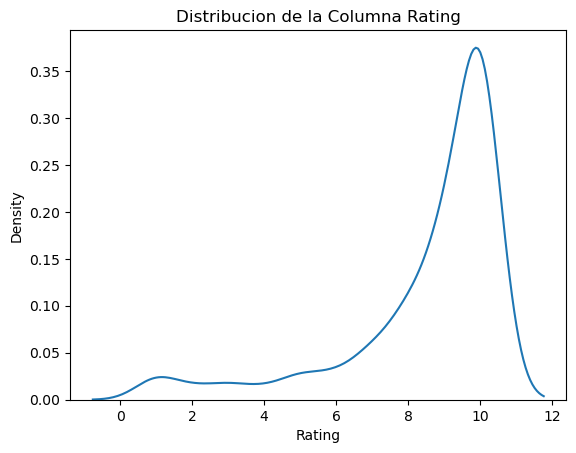

In [6]:
#Paso 4
sns.kdeplot(data=df, x="Rating")
plt.title("Distribucion de la Columna Rating")
plt.show()

En esta distibucion de forma similar a una normal se puede observar la concentracion de datos hacia el valor de 10 , esto con cierta razon nos indica que la mayor parte de reseñas son positivas, tambien observando se ve un valor atipico de 12

In [7]:
#Paso 5
columnas_objeto = df.select_dtypes(include=[object]).columns
for columna in columnas_objeto:
    print("valores unicos de la columna",columna, ":" ,df[columna].nunique())

valores unicos de la columna Title : 878
valores unicos de la columna Review : 878
valores unicos de la columna Date : 40


## ETAPA 2: ANÁLISIS DE SENTIMIENTOS.

### Paso 1. Muestre las primeras 10 filas del dataset con las columnas "Rating" y "Review", haga un análisis rápido de esa información.

### Paso 2. Haga una función que se encargue del pre-procesamiento:
#### - Genere los tokens.
#### - Filtre las palabras de parada.
#### - Obtenga el lema de las palabras y guárdelo en una lista.
#### - Retorne la lista en forma de una cadena, para ello debe unir los elementos de la lista mediante un espacio.

### Paso 3. Aplique la función creada para obtener el lema de las columnas "Review" y "Title", guárde el resultado en nuevas columnas dentro del dataframe original (por ejemplo: "ReviewText", "TitleText").

### Paso 4. Haga una función para obtener el sentimiento de las palabras, para ello puede utilizar el SentimentIntensityAnalizer() y su función "polarity_scores()". Al final debe retornar el puntaje de sentimiento.

### Paso 5. Aplique la función creada para obtener el sentimiento en las columnas creadas en el paso 3, guarde el resultado en un par de columnas nuevas (por ejemplo: "ReviewSentiment", "TitleSentiment").

### Paso 6. Prepare un dataframe con las columnas originales + las columnas creadas previamente, tendrían que haber 8 columnas, 3 de ellas deben ser numéricas (incluyendo "Rating").



In [8]:
#Paso 1
df_head_10 = df.loc[:9, ["Rating", "Review"]]
display(df_head_10)

,Rating,Review
0,8.0,I have to admit that I've never watched any of...
1,9.0,I'm a 60yo man & old school like the The Marin...
2,9.0,Every live action anime that I've briefly seen...
3,10.0,This is bar none one of the best live-action a...
4,10.0,"Being a one piece fan myself, I was a bit inse..."
5,10.0,GREAT ADAPTATION! As an old-school fan (since ...
6,9.0,My kids play and watch One Piece anime and lov...
7,10.0,I was so surprised that Netflix made something...
8,8.0,Parenthetically I don't know anything about th...
9,10.0,Initially I was apprehensive because of anime ...


La mayoria de las reseñas hablan de manera positiva de la adaptacion, en especial hacen enfasis en que no son apegados al mundo de one piece, o son personas alejadas al giro del anime, demostrando que no importa la edad o si conocen sobre el anime en general les sorpende lo bien que esta adaptado y en especial que netflix sea capaz de algo asi.

In [9]:
#Paso 2
def preprocess_text(text):
    
    tokens=word_tokenize(text.lower())
    
    filtered_tokens=[token for token in tokens if token not in stopwords.words('english')]
    
    lemmatizer=WordNetLemmatizer()
    lemmatized_tokens=[lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    processed_text=' '.join(lemmatized_tokens)
    
    return processed_text

In [10]:
#Paso 3
df['ReviewText'] = df['Review'].apply(preprocess_text)
df['TitleText'] = df['Title'].apply(preprocess_text)

In [11]:
#resultado
display(df)

,Title,Review,Date,Rating,ReviewText,TitleText
0,Never seen the anime and still enjoyed it,I have to admit that I've never watched any of...,4 September 2023,8.0,admit 've never watched animated show one piec...,never seen anime still enjoyed
1,Not My Kind of Show. But This I Loved.,I'm a 60yo man & old school like the The Marin...,4 September 2023,9.0,'m 60yo man & old school like marine admiral 😄...,kind show . loved .
2,I'm Shocked By How Good This Is...,Every live action anime that I've briefly seen...,1 September 2023,9.0,every live action anime 've briefly seen nothi...,'m shocked good ...
3,See Netflix?? You CAN do it...,This is bar none one of the best live-action a...,4 September 2023,10.0,bar none one best live-action adaption animate...,see netflix ? ? ...
4,WE WANT SEASON 2,"Being a one piece fan myself, I was a bit inse...",31 August 2023,10.0,"one piece fan , bit insecured starting series ...",want season 2
...,...,...,...,...,...,...
873,Most faithful and high quality adaptation sinc...,I haven't written a review in a very long time...,2 September 2023,10.0,n't written review long time long-time fan one...,faithful high quality adaptation since lord ring
874,Me and my son loving it! The best entertaining...,This is my first IMDb review.\n\nI've watched ...,1 September 2023,9.0,first imdb review . 've watched 8 episode one ...,son loving ! best entertaining exciting show y...
875,A very good adaptation to the famous anime,"An absolute gem! This show is a must-watch, an...",3 September 2023,10.0,"absolute gem ! show must-watch , wholeheartedl...",good adaptation famous anime
876,This wonderful thing...,I recently dived (no pun intended) into the wo...,2 September 2023,10.0,recently dived ( pun intended ) world one piec...,wonderful thing ...


In [12]:
# Paso 4
analyzer=SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    
    sentiment = 1 if scores['pos'] > 0 else 0
    
    return sentiment

In [13]:
# Paso 5
df['ReviewSentiment'] = df['ReviewText'].apply(get_sentiment)
df['TitleSentiment'] = df['TitleText'].apply(get_sentiment)

In [14]:
# Paso 6
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            878 non-null    object 
 1   Review           878 non-null    object 
 2   Date             878 non-null    object 
 3   Rating           870 non-null    float64
 4   ReviewText       878 non-null    object 
 5   TitleText        878 non-null    object 
 6   ReviewSentiment  878 non-null    int64  
 7   TitleSentiment   878 non-null    int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 55.0+ KB
None


## ETAPA 3: MACHINE LEARNING.

### Paso 1. Asigne a la variable X las columnas numéricas menos "Rating"; asigne a la variable y la columna "Rating", seleccione únicamente las filas sin datos nulos (no elimine ni trate las filas con datos nulos, esas se usarán para predecir)

### Paso 2. Divida en una muestra de entrenamiento y en una muestra de pruebas, estratifique en base a la proporción de la variable objetivo. El tamaño de la muestra para entrenamiento debe ser del 85%. Asigne una semilla para poder reproducir los resultados.

### Paso 3. Entrene los siguientes modelos:
#### - KNN para clasificación
#### - SVM para clasificación
#### - RandomForest para clasificación

### Paso 4. Evalúe el rendimiento de los modelos (puede usar accuracy) creados en el paso previo, muestre las predicciones realizadas y compare con las etiquetas reales.

### Paso 5. Debido a que este es un problema de clasificación, pero hay varias clases que son originalmente numéricas, se puede aplicar también una métrica de evaluación para regresión. Aplique el RMSE a las predicciones y las etiquetas reales, analice el resultado.

### Paso 6. Utilice el modelo que se comportó mejor para predecir el "Rating" de las filas que tienen ese dato nulo, revise manualmente si la calificación predicha es consistente con el comentario en la reseña.

### Paso 7. Escriba sus conclusiones al respecto.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

In [16]:
#Paso 1
X = df.drop(['Rating'], axis=1).select_dtypes(include=['float64', 'int64']).loc[df['Rating'].notnull()]
y = df['Rating'].loc[df['Rating'].notnull()]

display(X)

,ReviewSentiment,TitleSentiment
0,1,1
1,1,1
2,1,1
3,1,0
4,1,1
...,...,...
873,1,1
874,1,1
875,1,1
876,1,1


In [17]:
# Paso 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=50)

In [18]:
# Paso 3
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', metric='euclidean')

In [19]:
svm_model = SVC(random_state=45)

In [20]:
rf_model = RandomForestClassifier(n_estimators=500,max_depth=8,random_state=45)

In [21]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', weights='distance')

In [22]:
svm_model.fit(X_train, y_train)

SVC(random_state=45)

In [23]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=500, random_state=45)

In [24]:
# Paso 4 
print('Evaluación del modelo KNN:')
predicciones_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, predicciones_knn)
print(f'Accuracy del modelo KNN: {accuracy_knn}')
print('Predicciones vs Etiquetas reales:')
display(pd.DataFrame({'Predicciones': predicciones_knn, 'Reales': y_test}).head())

print('\nEvaluación del modelo SVM:')
predicciones_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, predicciones_svm)
print(f'Accuracy del modelo SVM: {accuracy_svm}')
print('Predicciones vs Etiquetas reales:')
display(pd.DataFrame({'Predicciones': predicciones_svm, 'Reales': y_test}).head())

print('\nEvaluación del modelo RandomForest:')
predicciones_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, predicciones_rf)
print(f'Accuracy del modelo RandomForest: {accuracy_rf}')
print('Predicciones vs Etiquetas reales:')
display(pd.DataFrame({'Predicciones': predicciones_rf, 'Reales': y_test}).head())

Evaluación del modelo KNN:
Accuracy del modelo KNN: 0.3511450381679389
Predicciones vs Etiquetas reales:


,Predicciones,Reales
547,10.0,6.0
272,10.0,10.0
671,10.0,10.0
531,8.0,1.0
525,8.0,8.0



Evaluación del modelo SVM:
Accuracy del modelo SVM: 0.4961832061068702
Predicciones vs Etiquetas reales:


,Predicciones,Reales
547,10.0,6.0
272,10.0,10.0
671,10.0,10.0
531,10.0,1.0
525,10.0,8.0



Evaluación del modelo RandomForest:
Accuracy del modelo RandomForest: 0.4961832061068702
Predicciones vs Etiquetas reales:


,Predicciones,Reales
547,10.0,6.0
272,10.0,10.0
671,10.0,10.0
531,10.0,1.0
525,10.0,8.0


In [26]:
# Paso 5
print('\nRMSE del modelo KNN:')
rmse_knn = mean_squared_error(y_test, predicciones_knn)
print(f'RMSE del modelo KNN: {rmse_knn}')

print('\nRMSE del modelo SVM:')
rmse_svm =mean_squared_error(y_test, predicciones_svm)
print(f'RMSE del modelo SVM: {rmse_svm}')

print('\nRMSE del modelo RandomForest:')
rmse_rf =mean_squared_error(y_test, predicciones_rf)
print(f'RMSE del modelo RandomForest: {rmse_rf}')


RMSE del modelo KNN:
RMSE del modelo KNN: 5.648854961832061

RMSE del modelo SVM:
RMSE del modelo SVM: 7.175572519083969

RMSE del modelo RandomForest:
RMSE del modelo RandomForest: 7.175572519083969


In [30]:
#Paso 6

# Filtrar filas con datos nulos para predecir
df_nulos = df[df['Rating'].isnull()]

# Seleccionar las variables numéricas para las filas con datos nulos
X_nulos = df_nulos.drop(['Rating'], axis=1).select_dtypes(include=['float64', 'int64'])

# Predecir con el mejor modelo (RandomForest)
predicciones_nulos = knn_model.predict(X_nulos)

# Agregar las predicciones como una nueva columna al DataFrame de datos nulos
df_nulos['Rating_Predicho'] = predicciones_nulos

# Mostrar el DataFrame de datos nulos con las reseñas y las predicciones
display(df_nulos[['Review', 'Rating_Predicho']])


C:\Users\mjkam\AppData\Local\Temp\ipykernel_13728\3472276573.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nulos['Rating_Predicho'] = predicciones_nulos


,Review,Rating_Predicho
143,"I admit, when I write reviews it's usually whe...",10.0
145,"Fun fact: Eiichiro Oda, the creator of the man...",10.0
447,Just because there are many scenes in the mang...,8.0
500,I like the characters so far except Sanji's ha...,10.0
520,One Piece somehow managed to pull it off: a le...,10.0
540,As a life long fan of One Piece I don't know w...,8.0
569,If you browse there are series with more actio...,8.0
782,Everything went so right with casting and thei...,8.0


####  Paso 7
A mi perspectiva casi la mayoria las predijo mal, pero tambien es importante leer las reseñas puesto que se puede notar que al menos unas cuentas de ellas pueden resultar ambiguas incluso para un ser humano, asi que para mi los modelos de machine learning tradicionales no resultarian muy efectivos para este tipo de problemas, lo que no hace mas que resaltar la utilidad del analisis de sentimientos en ciencia de datos; sin embargo aun queda la posibilidad de utilizar modelos mas complejos como un ensamble o una red neuronal artificial.

## ETAPA 4: PRESENTACIÓN DEL PROYECTO.
### Al igual que en los proyectos anteriores, suba su trabajo terminado a un repositorio nuevo de su GitHub.
### Escriba un archivo "README" y describa el proceso seguido en este trabajo.
### Al entregar este trabajo, debe subir este archivo, el archivo de instrucciones y el enlace al repositorio público de GitHub con este trabajo.